<a href="https://colab.research.google.com/github/harinigaddipati/EDA_car_features/blob/master/cardata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORATORY DATA ANALYSIS IN PYTHON**

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. By the name itself, we can get to know that it is a step in which we need to explore the data set.
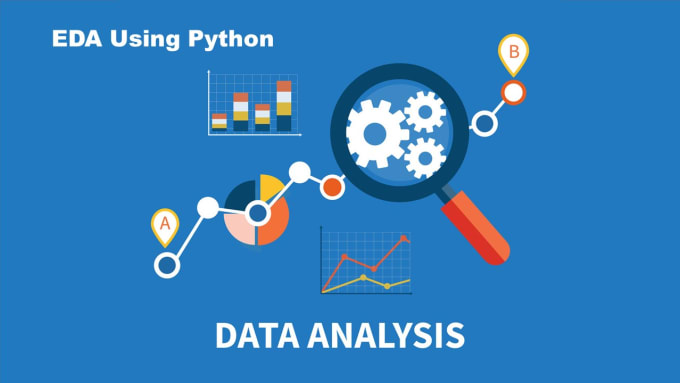
*   **Need For Exploratory Data Analysis**

Exploratory Data Analysis is a crucial step before you jump to machine learning or modeling of your data. By doing this you can get to know whether the selected features are good enough to model, are all the features required, are there any correlations based on which we can either go back to the Data Pre-processing step or move on to modeling.

Once Exploratory Data Analysis is complete and insights are drawn, its feature can be used for supervised and unsupervised machine learning modeling.


*  **The Steps In Exploratory Data Analysis In Python**

There are many steps for conducting Exploratory data analysis. I want to discuss regarding the below few steps:
1. Description of data
2. Handling missing data
3. Handling outliers
4. Understanding relationships and new insights through plots

*   **What data are we exploring today ?**

The data-set can be downloaded from here. To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this notebook, we will explore the data and make it ready for modeling.












# **1.** **Importing the required libraries for EDA**

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline  

# **1.1 Loading the data into the data frame**

In [100]:
from google.colab import files
upload = files.upload()

Saving data.csv to data (2).csv


In [101]:
df = pd.read_csv("data.csv")
#To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [102]:
df.tail(5)                      
# To display the botton 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# **1.2. Checking the types of data and basic summary stats**

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8546 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S.no           8546 non-null   object 
 1   Make           8546 non-null   object 
 2   Model          8546 non-null   int64  
 3   Year           8546 non-null   float64
 4   HP             8546 non-null   float64
 5   Cylinders      8546 non-null   object 
 6   Transmission   8546 non-null   object 
 7   Drive Mode     8546 non-null   object 
 8   Vehicle Size   8546 non-null   object 
 9   Vehicle Style  8546 non-null   int64  
 10  MPG-H          8546 non-null   int64  
 11  MPG-C          8546 non-null   int64  
 12  Popularity     8546 non-null   int64  
 13  Price          8546 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ MB


In [86]:
df.describe()

,Model,Year,HP,Vehicle Style,MPG-H,MPG-C,Popularity
count,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000
mean,2011.262579,234.544816,5.373859,26.740229,19.472970,1204.362626,30899.302598
std,6.312690,76.973850,1.376154,5.646058,4.332768,864.513619,15142.822920
min,1994.000000,66.000000,3.000000,13.000000,10.000000,21.000000,2000.000000
25%,2008.000000,171.000000,4.000000,23.000000,16.000000,535.000000,21821.250000
50%,2015.000000,227.000000,6.000000,26.000000,19.000000,1013.000000,29830.000000
75%,2016.000000,290.000000,6.000000,31.000000,22.000000,1851.000000,39950.000000
max,2017.000000,485.000000,8.000000,42.000000,31.000000,3916.000000,75010.000000


# **2. Dropping irrelevant columns**

This step is certainly needed in EDA because sometimes there would be columns that we never use and in such cases dropping is useful. In this case, the columns such as Engine Fuel Type and Number of doors maynot be very relevant.

In [103]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Number of Doors'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **3. Renaming the columns**

Sometimes, column names can be confusing or not readable, so its a good practice to rename column names as it improves the readability of the data set.

In [104]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **4.1  Dropping the duplicate rows**

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data, so here we remove all the duplicate value from the data-set.

In [89]:
df.shape

(8546, 14)

In [90]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


In [91]:
df.count()      
# Used to count the number of rows

S.no             8546
Make             8546
Model            8546
Year             8546
HP               8546
Cylinders        8546
Transmission     8546
Drive Mode       8546
Vehicle Size     8546
Vehicle Style    8546
MPG-H            8546
MPG-C            8546
Popularity       8546
Price            8546
dtype: int64

there are 11914 rows and we are removing 729 rows of duplicate data

In [92]:
df = df.drop_duplicates()
df.head(5)

,S.no,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135,40-59K
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650,40-59K
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350,20-39K
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450,20-39K
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500,20-39K


In [93]:
df.shape

(8546, 14)

# **4.2 Dropping the missing or null values**

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not the best approach and generally people just replace the missing values with the mean or the average of that column. This helps in fine tuning the model performance as more the data, a model has the better it performs. But the objective of this project is to do EDA and its fine to drop missing values and also the number of missing values is small compared to the entire dataset

In [105]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


the reason is in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

In [106]:
df = df.dropna()    
# Dropping the missing values.
df.count()


Make             11816
Model            11816
Year             11816
HP               11816
Cylinders        11816
Transmission     11816
Drive Mode       11816
Vehicle Size     11816
Vehicle Style    11816
MPG-H            11816
MPG-C            11816
Popularity       11816
Price            11816
dtype: int64

we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP))

In [107]:
print(df.isnull().sum())   
# After dropping the values

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


# **5.1 Detecting Outliers**

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers.

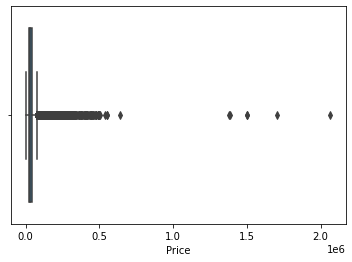

In [108]:
sns.boxplot(x=df['Price'])

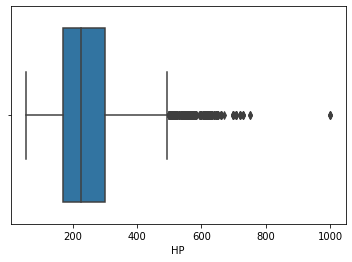

In [109]:
sns.boxplot(x=df['HP'])

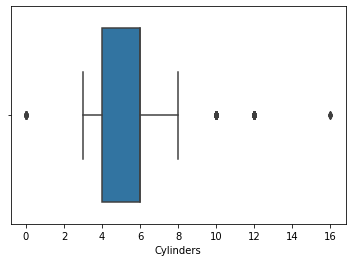

In [110]:
sns.boxplot(x=df['Cylinders'])

In [111]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21215.0
dtype: float64


In [112]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9054, 13)

# **6. What are the most represented car brands ?**

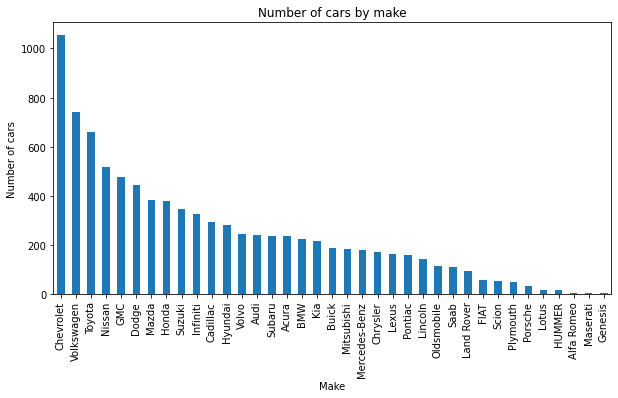

In [113]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

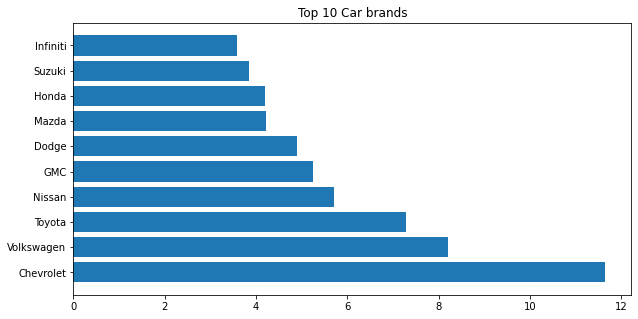

In [114]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

**Average pricing among top car brands**

In [115]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   27591.962049
Dodge       25983.345372
GMC         32866.520000
Honda       27511.286842
Mazda       20366.657963
Nissan      28148.655706
Toyota      29223.393020
Volkswagen  28339.133244


# **7. Correlation Matrix**

In [116]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.331045,-0.103871,0.362915,0.329151,0.202846,0.605823
HP,0.331045,1.000000,0.737088,-0.467776,-0.562446,0.109508,0.740422
Cylinders,-0.103871,0.737088,1.000000,-0.705080,-0.755770,0.030146,0.379489
MPG-H,0.362915,-0.467776,-0.705080,1.000000,0.938825,0.072418,-0.121129
MPG-C,0.329151,-0.562446,-0.755770,0.938825,1.000000,0.063520,-0.192756
Popularity,0.202846,0.109508,0.030146,0.072418,0.063520,1.000000,0.119780
Price,0.605823,0.740422,0.379489,-0.121129,-0.192756,0.119780,1.000000


**Significant correlation**
  between Cylinders & HP, MPG-H & MPG-C

The more cylinders there are, the more powerful the car is




**Negative correlation** between MPG-H & Cylinders 

MPG-H / Engine Cylinders have a strong negative correlation with MPG-H & C because lower MPG figures mean higher fuel consumption.




# **8. EDA**

**Heat Maps**

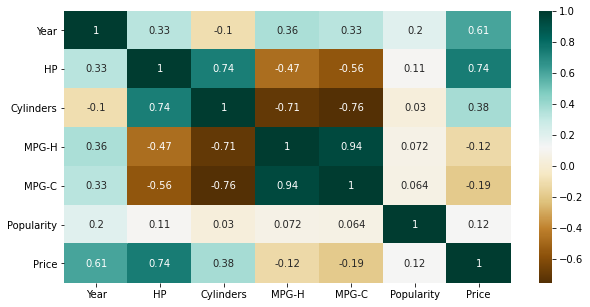

In [117]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

**Scatter** **Plot**

 The scatter plot is plotted between Horsepower and Price. With the plot given below, we can easily draw a trend line.



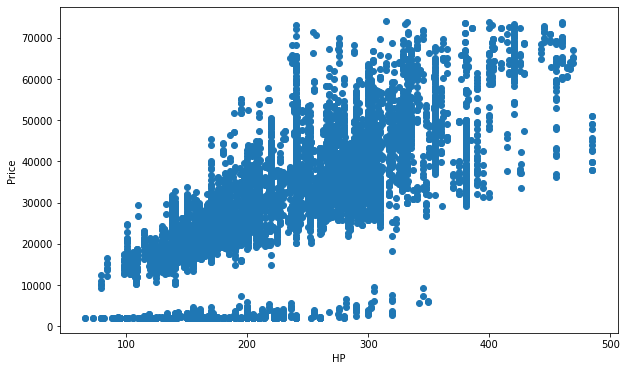

In [118]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

## Which vehicle style segment cars is sold most?

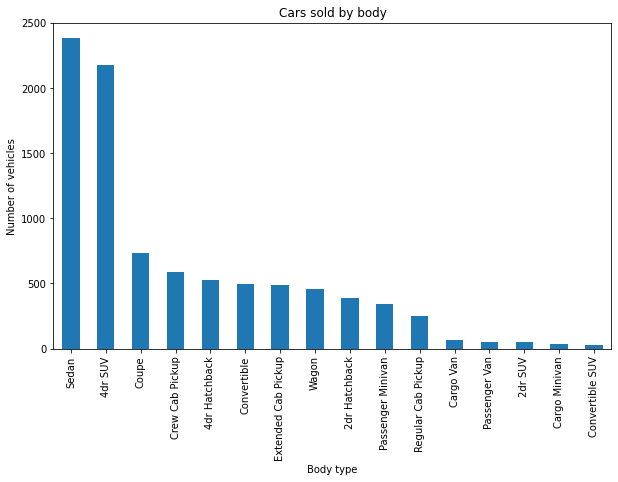

In [119]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))                     
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Body type');

Text(0.5, 0, 'Count of vehicles')

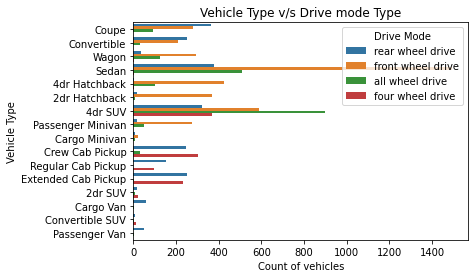

In [120]:
# Vehicle Style type and Drive type analysis
sns.countplot(y='Vehicle Style',data=df, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')

### **Effect of various variables on the price of the car**

In [121]:
# Creating a new column 'Price_range' and assigning the values based on the price of the car
df['price_range'] = pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
df['price_range'] = df['price_range'].astype(object)

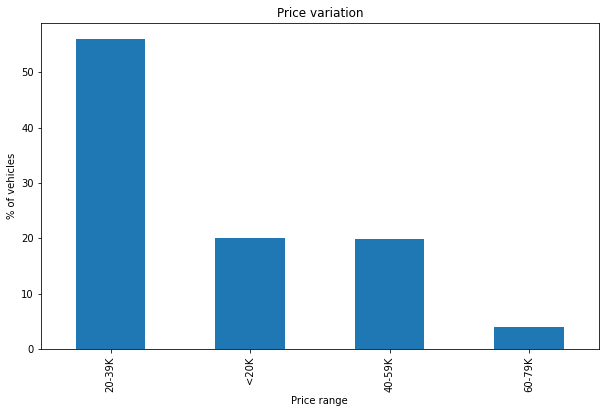

In [122]:
(df['price_range'].value_counts() / len(df) *100).plot.bar(figsize=(10,6))
plt.title("Price variation")
plt.ylabel('% of vehicles')
plt.xlabel('Price range');

# **9.Building a Machine Learning Model**

In [123]:
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [124]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [125]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [126]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

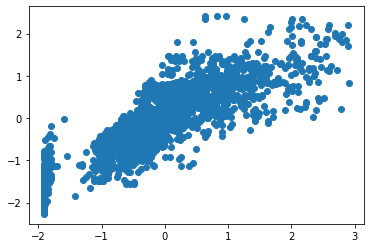

In [127]:
# Using scatterplot to predict the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

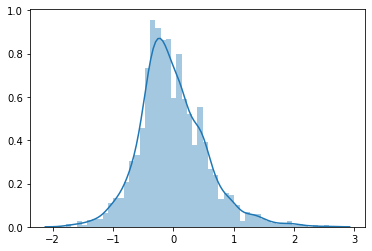

In [128]:
sns.distplot((y_test-y_pred),bins=50)

In [129]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4217686403786609
Root Mean Squared Error: 0.5496821012627814
R2 Score: 0.6984942153653955


# **10.Checking the performance of various algorithms**

In [130]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

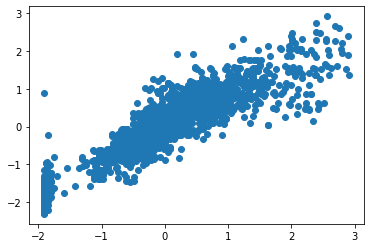

In [131]:
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

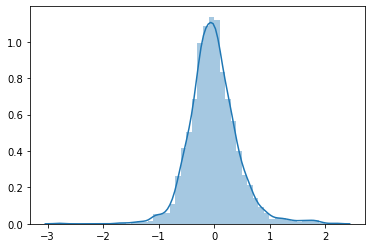

In [132]:
sns.distplot((y_test-y_pred),bins=50)

In [133]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.32117307459645805
Root Mean Squared Error: 0.4388022355496212
R2 Score: 0.8078633915281656


In [134]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit (X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

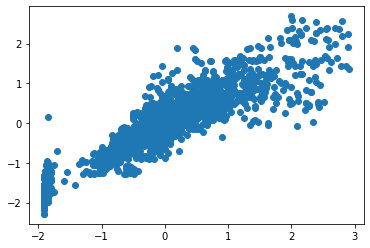

In [135]:
# Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

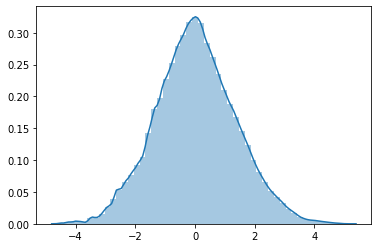

In [136]:
sns.distplot((y_test-y_pred),bins=50)

In [137]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.3057162302538289
Root Mean Squared Error: 0.43292718565669214
R2 Score: 0.8129739189201542


In [138]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

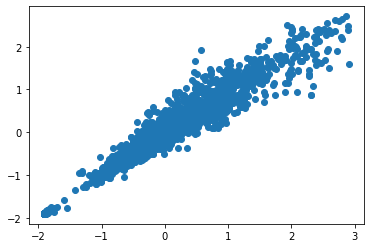

In [139]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

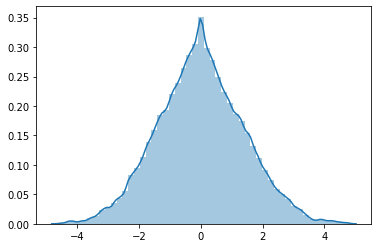

In [140]:
sns.distplot((y_test-y_pred),bins=50)

In [141]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17688391650281743
Root Mean Squared Error: 0.25597291374400083
R2 Score: 0.9346176567110074


# **Summary**

By considering all metrics, it can be concluded that random forest the best model for the prediction for used car prices. Random Forest as a regression model gave the best MAE, MSE and RMSE values. According to random forest, here are the most important features:Popularity, Year, HP, Cylinders, MPG-H, MPG-C.